In [1]:
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

In [2]:
def S_HbXY(P_O2, P_CO2):
    '''
    Saturations S_HbO2 and S_HbCO2 as functions of
    gas partial pressures P_O2 and P_CO2. It is assumed
    that partial pressures are equal in plasma and inside
    red blood cells (Dash & Bassingthwaighte, 2010).
    '''

    # Known parameters (reaction rates, Fick's law constants)
    alpha_CO2 = 3.27E-5             # M mmHg^-1
    alpha_O2 = 1.46E-6              # M mmHg^-1

    K2p = 21.5                      # M^-1
    K2pp = 1E-6                     # M
    K3p = 11.3                      # M^-1
    K3pp = 1E-6                     # M
    K5pp = 2.63E-8                  # M
    K6pp = 1.91E-8                 # M

    # Red blood cell pH (with pH_plasma = 7.4).
    pH_rbc = 7.24
    c_H = 10**(-pH_rbc)

    # Variables defined in Dash & Bassingthwaighte (2016).
    phi_1 = 1 + (K2pp/c_H)
    phi_2 = 1 + (K3pp/c_H)
    phi_3 = 1 + (c_H/K5pp)
    phi_4 = 1 + (c_H/K6pp)

    # P50 as function of carbon dioxide deviation from standard.
    P50_std = 26.8                  # mmHg
    P_CO2_std = 40                  # mmHg
    P50 = P50_std + 1.273E-1*(P_CO2-P_CO2_std) + 1.083E-4*(P_CO2-P_CO2_std)**2
    # P50 = P50_std

    # Variable nH (Hill equation exponent), fit to data.
    alpha = 2.82
    beta = 1.20
    gamma = 29.25

    nH = alpha - beta*10**(-P_O2/gamma)
    # nH = 2.7
    K4p = ((alpha_O2*P_O2)**(nH-1))*(K2p*alpha_CO2*P_CO2*phi_1 + phi_3)
    K4p /= (((alpha_O2*P50)**(nH))*(K3p*alpha_CO2*P_CO2*phi_2 + phi_4))

    K_HbO2 = (K4p*(K3p*phi_2*alpha_CO2*P_CO2 + phi_4))
    K_HbO2 /= (K2p*phi_1*alpha_CO2*P_CO2 + phi_3)

    K_HbCO2 = (K2p*phi_1 + K3p*K4p*phi_2*alpha_O2*P_O2)
    K_HbCO2 /= (phi_3 + K4p*phi_4*alpha_O2*P_O2)

    S_HbO2 = (K_HbO2*alpha_O2*P_O2)/(1+(K_HbO2*alpha_O2*P_O2))
    S_HbCO2 = (K_HbCO2*alpha_CO2*P_CO2)/(1+(K_HbCO2*alpha_CO2*P_CO2))
    
    return S_HbO2, S_HbCO2

(15, 2)


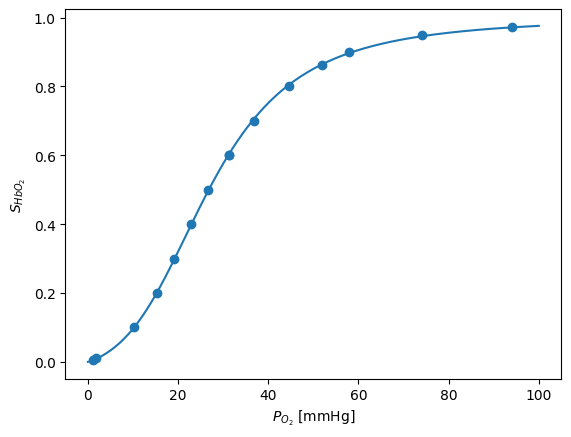

In [3]:
P_O2 = np.linspace(0,100,200)
P_CO2 = 40*np.ones_like(P_O2)

S_HbO2, S_HbCO2 = S_HbXY(P_O2, P_CO2)

severinghaus_points = np.array([[1.02, 0.6], [1.70, 1.0],
                               [10.3, 10], [15.4, 20],
                               [19.2,30], [22.8, 40],
                               [26.6, 50], [31.2, 60],
                               [31.2, 60], [36.9, 70],
                               [44.5, 80], [52.0, 86.2],
                               [58.0, 90], [74.2, 95],
                               [94.0, 97.2]])

print(severinghaus_points.shape)

fig, ax = plt.subplots()
ax.plot(P_O2, S_HbO2)
# ax.plot(P_O2, S_HbO2_old)
ax.scatter(severinghaus_points[:,0], severinghaus_points[:,1]/100)
ax.set_ylabel(r"$S_{HbO_2}$ ")
ax.set_xlabel(r"$P_{O_2}$ [mmHg]")
plt.show()

[  1.  26.  51.  76. 101. 126. 151.]


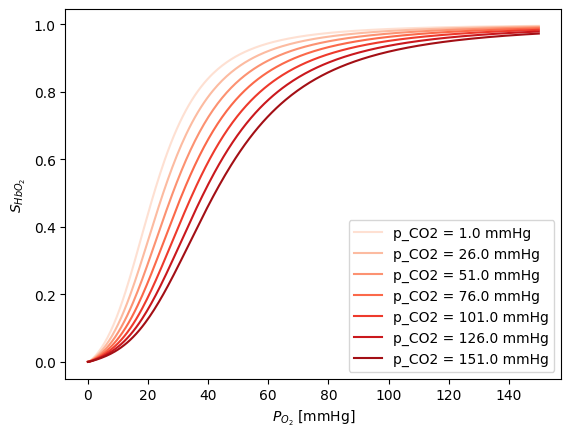

In [4]:
import seaborn as sns

P_O2 =  np.linspace(0, 150, 300)
P_CO2 = np.linspace(1, 151, 7)
print(P_CO2)

# S_HbO2, S_HbCO2 = S_HbXY(P_O2, P_CO2)

colores = sns.color_palette("Reds", int(P_CO2.shape[0]))

fig, ax = plt.subplots()
# ax.plot(P_CO2, S_HbCO2)

for i in range(int(P_CO2.shape[0])):
    S_HbO2, S_HbCO2 = S_HbXY(P_O2, P_CO2[i])
    ax.plot(P_O2, S_HbO2, color=colores[i], label=f'p_CO2 = {P_CO2[i]} mmHg')

ax.set_ylabel(r"$S_{HbO_2}$ ")
ax.set_xlabel(r"$P_{O_2}$ [mmHg]")
ax.legend()
plt.show()

[  1.  26.  51.  76. 101. 126. 151.]


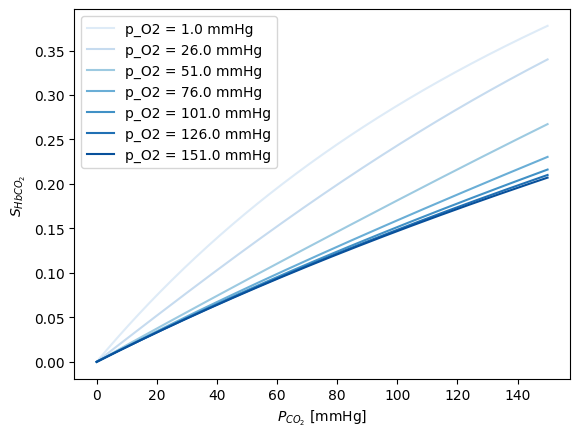

In [30]:

P_O2 =  np.linspace(1, 151, 7)
print(P_O2)
P_CO2 = np.linspace(0, 150, 300)

# S_HbO2, S_HbCO2 = S_HbXY(P_O2, P_CO2)

colores = sns.color_palette("Blues", int(P_O2.shape[0]))

fig, ax = plt.subplots()
# ax.plot(P_CO2, S_HbCO2)

for i in range(int(P_O2.shape[0])):
    S_HbO2, S_HbCO2 = S_HbXY(P_O2[i], P_CO2)
    ax.plot(P_CO2, S_HbCO2, color=colores[i], label=f'p_O2 = {P_O2[i]} mmHg')

ax.set_ylabel(r"$S_{HbCO_2}$ ")
ax.set_xlabel(r"$P_{CO_2}$ [mmHg]")
ax.legend()
plt.show()